<a href="https://colab.research.google.com/github/AlexanderG40/Data-Science/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is it. This is my final project, my dataset I found and I will do this project out of will be based on the stock of the Coca-Cola company, they are not only one of the biggest company in the US, they provide a ton of drinks world-wide to the rest of the world. Overview: this dataset was downloaded from the kaggle website, they are a website where students and even researchers can download CSV files to work on.

In [1]:
# First we import all of our libraries that I will be using for this final
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# here we finally call our CSV dataset and also print a sample of our data
df = pd.read_csv('/content/KO_1919-09-06_2025-04-06.csv')
df.sample(10)

,date,open,high,low,close,adj_close,volume
4302,1979-03-02 00:00:00-05:00,0.875000,0.875000,0.872396,0.872396,0.228194,1627200
6377,1987-05-18 00:00:00-04:00,2.484375,2.500000,2.421875,2.484375,0.998018,23360000
14826,2020-11-23 00:00:00-05:00,52.950001,53.169998,52.200001,52.680000,45.958160,13191900
2801,1973-03-23 00:00:00-05:00,1.466146,1.489583,1.429688,1.455729,0.318095,2380800
7222,1990-09-19 00:00:00-04:00,5.156250,5.187500,4.968750,4.968750,2.176041,6417600
3838,1977-04-29 00:00:00-04:00,0.773438,0.778646,0.764323,0.770833,0.187665,4377600
7581,1992-02-20 00:00:00-05:00,9.625000,9.921875,9.546875,9.890625,4.421522,8597600
9449,1999-07-14 00:00:00-04:00,31.093750,31.093750,30.781250,30.937500,15.190492,5309600
193,1962-10-05 00:00:00-04:00,0.208984,0.211589,0.206380,0.211589,0.037820,921600
13360,2015-01-29 00:00:00-05:00,41.770000,42.150002,41.470001,42.099998,30.408611,13657900


I will go a bit over my data it is pretty straight forward: Date: the date of the trading, Open: the opening stock price, high: the highest stock price of the day, low: the lowest stock price of the day, close: the price of the stock when the stock market closed for the day, Adj_close: The adjusted close price of the stock, Volume: The total number of times the share/stock was traded.

When I was researching this dataset the author of this dataset said there was no null values which makes sense. Because since it is a stock price there should be no null values other wise my data would be almost useless.

In [3]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [8]:
# we drop the adj close
df.drop(columns=["adj_close"], inplace=True)

My data has 7 columns and has 15,922 rows of data.

In [9]:
# we print out our data types to see what type it is: float, int, object
df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64


In [10]:
df.describe()

,open,high,low,close,volume
count,15922.000000,15922.000000,15922.000000,15922.000000,1.592200e+04
mean,18.450788,18.598529,18.299819,18.455364,9.334420e+06
std,19.432024,19.570869,19.288910,19.434456,7.954781e+06
min,0.192708,0.193359,0.182292,0.192057,7.680000e+04
25%,0.888021,0.895833,0.880208,0.888021,3.111600e+06
50%,10.531250,10.625000,10.468750,10.531250,8.087650e+06
75%,31.946876,32.355938,31.591562,31.968750,1.329548e+07
max,73.300003,73.949997,72.320000,73.180000,1.241690e+08


The describe function allows us to view the statistics before we do any KNN algorithms and even decision trees. Gives us a good understanding at how our data will look.

Now that our data is clean, even though we did not have to do much cleaning. I will do some explorated data analysis (EDA) to view as a barplot, jointplot, boxplot, etc our data.

<Axes: xlabel='Range', ylabel='Count'>

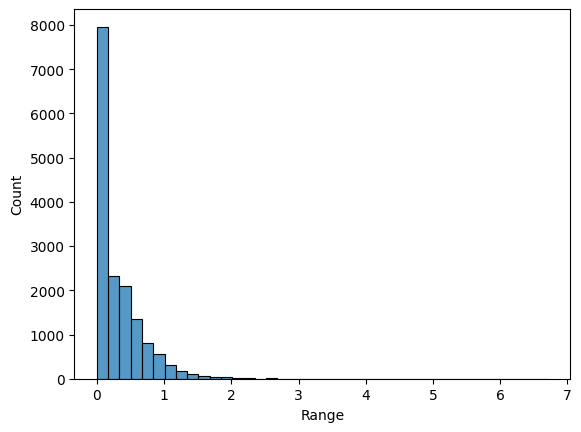

In [29]:
# we import matplot lib to do some EDA
import matplotlib.pyplot as plt
import seaborn as sns
# we will first calculate the range between our stock open vs close we will look for the range
df['Range'] = df['high'] - df['low']
sns.histplot(df['Range'], bins = 40)

This shows the trading range of our coca - cola stock which helps me see the volatility of the stock price before we do the machine learning algorithm.

<Axes: >

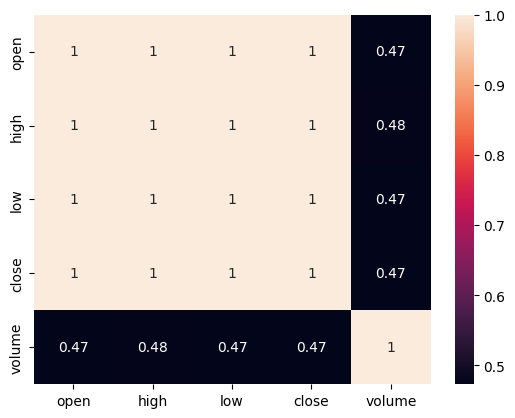

In [25]:
# we will set up a heat map to see our visualization
# this prints out a correlation of my heatmap
import seaborn as sns
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True)

This shows me my columns which is the open, high, low, etc. So it shows it as a heatmap but with a correlation

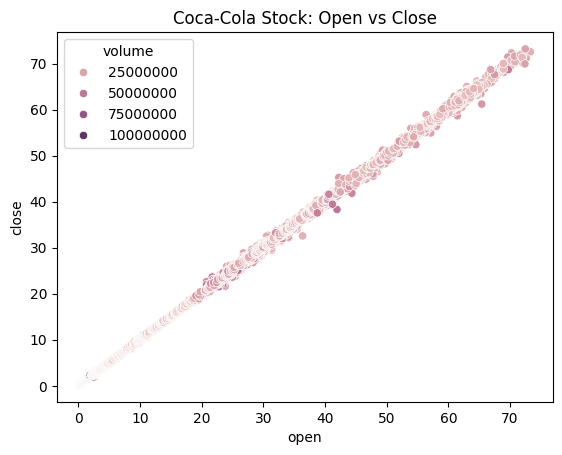

In [35]:
# we use a joint plot to create a histogram and also a scatterplot
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data = df, x = "open", y = "close", hue = "volume")
plt.title("Coca-Cola Stock: Open vs Close")
plt.show()

Finally we see the correlation on how well a stock open against closed and the volume: number of time the stock traded.

We will do a simple linear regression algorithm to predict the close price based on our dataset

In [36]:
# we split our data into training and testing
# we add the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
# features
X = df[['open', 'high', 'low', 'volume']]
# target
y = df['close']
# according to the youtube video I watched this is the easy way to do this
# because it gets all the we need values in one spot
# https://youtu.be/O2Cw82YR5Bo?si=hr6ZmAF4rQ8MCzXF&t=1320
# we create our variables for our training and testing
# we also set the test size which is the size for size of our training
# random state is the number for reproducing a random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [40]:
# we train the model here
coca = LinearRegression()
coca.fit(X_train, y_train)

LinearRegression()

In [41]:
# we look at our coefficient which is a formula our computer does to look for the coefficients in the dataset
coca.coef_

array([-5.31309838e-01,  7.89491497e-01,  7.41797222e-01, -2.66238143e-10])

In [42]:
# start of our predictions
coca_predictions = coca.predict(X_test)
coca_predictions

array([39.36362616, 32.96082578, 46.13135336, ...,  1.29142754,
       21.57558577, 10.30769782])

Ok, so this above is all the predictions of what my model thinks are target column based on the x

<Axes: xlabel='Coca-Cola Predictions', ylabel='close'>

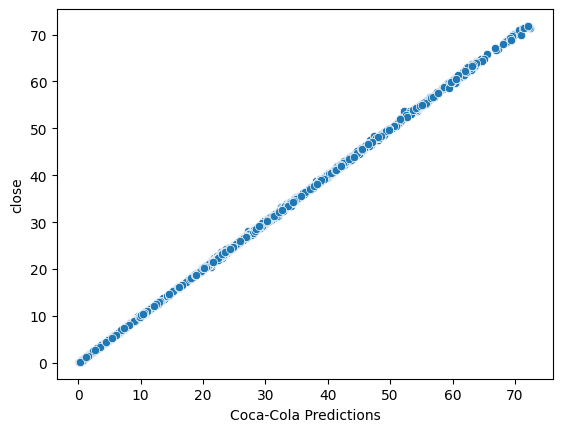

In [46]:
# we will visualize to see if the predicted var are accurate compared to the real results
# we added a label to make it easier to see
plt.xlabel("Coca-Cola Predictions")
sns.scatterplot(x = coca_predictions,y = y_test)

As we can see our model was pretty accurate because if it was bad it would be all over the place however, we get a straight line.

In [48]:
# we import a library from sklearn to see just to double check our linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_test, coca_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, coca_predictions))

Mean Absolute Error: 0.06953110834272962
Mean Squared Error: 0.017738824829474524


I will explain this to the best of my ability since I somewhat forgot what they both did. Ok, according to my research it is another formula done by the computer to test the accuracy of the linear regression prediction. To keep it simple this is the best way to find out how well they both did and lower number means the dataset did better.
https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df

https://www.geeksforgeeks.org/mean-squared-error/